<a href="https://colab.research.google.com/github/ConnieNCSU/Time-Series-Forecasting-SARIMA-LSTM/blob/main/Time_Series_Forecasting_SARIMA_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Monthly Beer Production with Python (SARIMA, LSTM)

In this project I forecast a time series data (Monthly beer production) using ARIMA (Autoregressive Integrated Moving Average), LSTM (Long Short Term Memory Neural Network) with Python and inspect their results. 

In [1]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
#from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

## Read Dataset

In [2]:
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive/')
df=pd.read_csv('/content/gdrive/My Drive/Electric_Production.csv')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
df.rename(columns={'IPG2211A2N': 'Monthly beer production'}, inplace=True)

In [4]:
df.head()

,DATE,Monthly beer production
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DATE                     397 non-null    object 
 1   Monthly beer production  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [6]:
df.DATE = pd.to_datetime(df.DATE)

In [7]:
df = df.set_index("DATE")
df.head()

,Monthly beer production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [8]:
df.index.freq = 'MS'

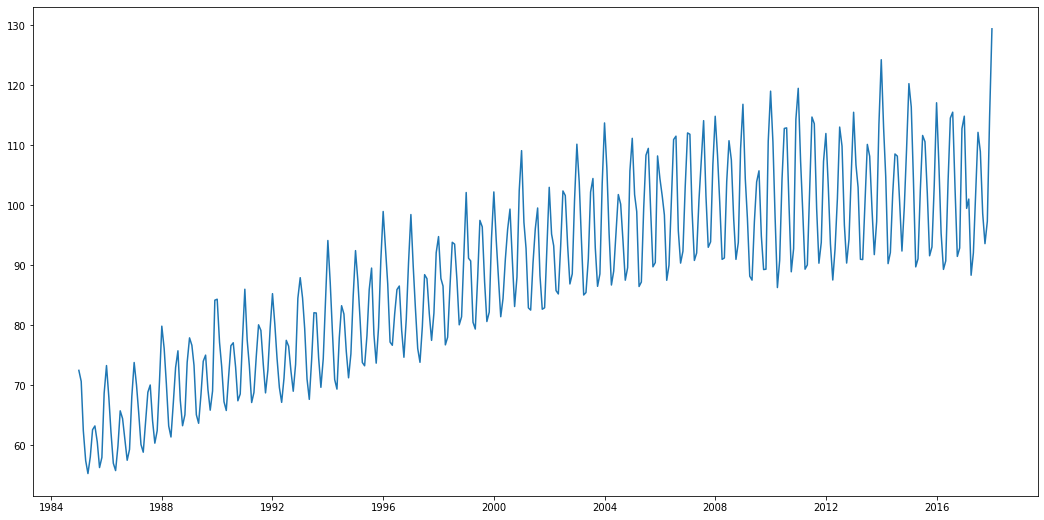

In [9]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["Monthly beer production"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show();

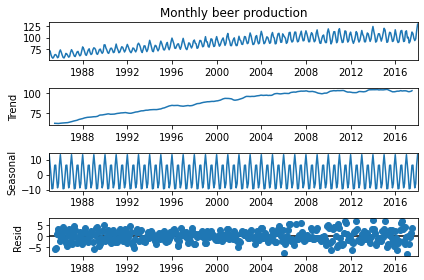

In [10]:
a = seasonal_decompose(df["Monthly beer production"], model = "add")
a.plot();

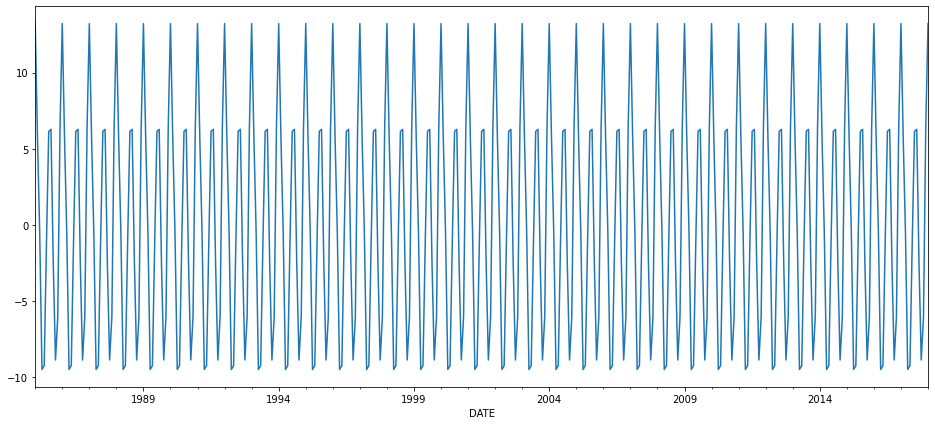

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

## ARIMA Forecast

Let's run auto_arima() function to get best p,d,q,P,D,Q values

In [12]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from pmdarima import auto_arima

In [14]:
auto_arima(df['Monthly beer production'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  397
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -925.807
Date:                              Mon, 06 Feb 2023   AIC                           1863.613
Time:                                      16:05:27   BIC                           1887.502
Sample:                                  01-01-1985   HQIC                          1873.077
                                       - 01-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3548      0.091      3.894      0.000       0.176       0.533
ma.L1         -0.7261      0.090     -8.099      0.000      -0.902      -0.550
ma.L2         -0.2114      0.079     -2.683      0.007      -0.366      -0.057
ar.S.L12       0.9958      0.003    306.585      0.000       0.989       1.002
ma.S.L12      -0.7616      0.038    -20.152      0.000      -0.836      -0.688
sigma2         5.7574      0.326     17.669      0.000       5.119       6.396
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                28.04
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               2.99   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

m: The number of seasonal time steps (e.g. 12 for monthly data)

As we can see best arima model chosen by auto_arima() is **SARIMAX(1, 1, 2)x(1, 0, [1], 12)**

Let's split the data into train and test set

In [23]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [16]:
arima_model = SARIMAX(train_data['Monthly beer production'], order = (1,1,2), seasonal_order = (1,0,1,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Monthly beer production   No. Observations:                  385
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -883.713
Date:                              Mon, 06 Feb 2023   AIC                           1779.427
Time:                                      16:20:00   BIC                           1803.130
Sample:                                  01-01-1985   HQIC                          1788.829
                                       - 01-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3642      0.101      3.594      0.000       0.166       0.563
ma.L1         -0.7489      0.102     -7.330      0.000      -0.949      -0.549
ma.L2         -0.1873      0.090     -2.071      0.038      -0.365      -0.010
ar.S.L12       0.9956      0.003    294.462      0.000       0.989       1.002
ma.S.L12      -0.7521      0.037    -20.308      0.000      -0.825      -0.679
sigma2         5.3379      0.327     16.327      0.000       4.697       5.979
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                17.07
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               2.69   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

2017-02-01    107.430040
2017-03-01     99.875634
2017-04-01     90.218754
2017-05-01     91.987700
2017-06-01    103.068040
2017-07-01    112.195774
2017-08-01    111.831664
2017-09-01    101.292014
2017-10-01     92.362612
2017-11-01     95.431199
2017-12-01    109.832888
2018-01-01    117.748430
Freq: MS, Name: ARIMA Predictions, dtype: float64

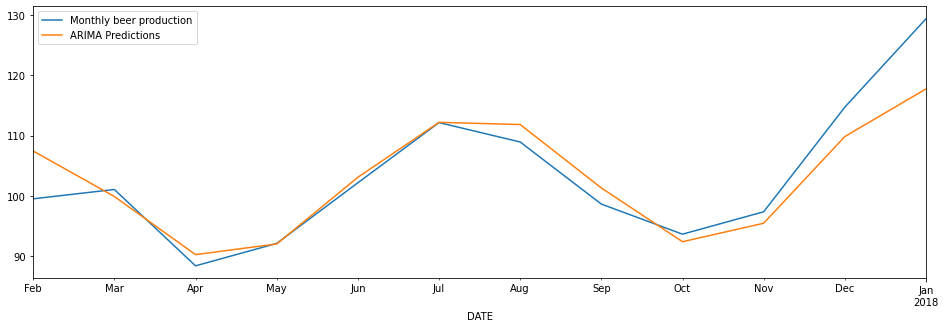

In [18]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [19]:
arima_rmse_error = rmse(test_data['Monthly beer production'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 20.771869443237364
RMSE Error: 4.557616640661801
Mean: 88.84721763224182


## LSTM Forecast

First we'll scale our train and test data with MinMaxScaler

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [24]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

Before creating LSTM model we should create a Time Series Generator object.

In [25]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [27]:
lstm_model.fit_generator(generator,epochs=20)

Epoch 1/20
373/373 [==============================] - 5s 10ms/step - loss: 0.0217
Epoch 2/20
373/373 [==============================] - 4s 10ms/step - loss: 0.0151
Epoch 3/20
373/373 [==============================] - 4s 10ms/step - loss: 0.0086
Epoch 4/20
373/373 [==============================] - 4s 10ms/step - loss: 0.0052
Epoch 5/20
373/373 [==============================] - 4s 10ms/step - loss: 0.0037
Epoch 6/20
373/373 [==============================] - 4s 10ms/step - loss: 0.0029
Epoch 7/20
373/373 [==============================] - 4s 10ms/step - loss: 0.0030
Epoch 8/20
373/373 [==============================] - 4s 10ms/step - loss: 0.0027
Epoch 9/20
373/373 [==============================] - 4s 10ms/step - loss: 0.0027
Epoch 10/20
373/373 [==============================] - 4s 10ms/step - loss: 0.0024
Epoch 11/20
373/373 [==============================] - 4s 10ms/step - loss: 0.0026
Epoch 12/20
373/373 [==============================] - 4s 10ms/step - loss: 0.0021
Epoch 13/20
3

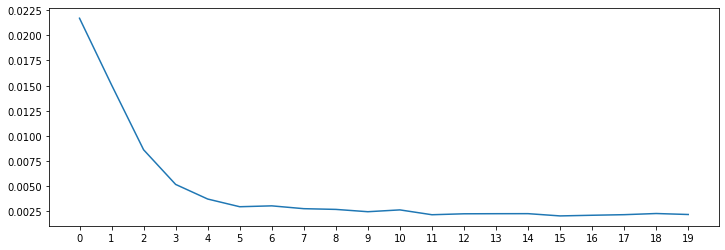

In [28]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [29]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

1/1 [==============================] - 0s 23ms/step


As you know we scaled our data that's why we have to inverse it to see true predictions.

In [30]:
lstm_predictions_scaled

[array([0.7813404], dtype=float32),
 array([0.65317315], dtype=float32),
 array([0.57311124], dtype=float32),
 array([0.62310046], dtype=float32),
 array([0.7907834], dtype=float32),
 array([0.9110085], dtype=float32),
 array([0.8931477], dtype=float32),
 array([0.7508343], dtype=float32),
 array([0.6161184], dtype=float32),
 array([0.6455966], dtype=float32),
 array([0.84751797], dtype=float32),
 array([0.9443694], dtype=float32)]

In [31]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [32]:
lstm_predictions

array([[109.1805523 ],
       [100.34472623],
       [ 94.82527399],
       [ 98.27152106],
       [109.8315498 ],
       [118.11984222],
       [116.88852429],
       [107.07746552],
       [ 97.79017731],
       [ 99.8224021 ],
       [113.74281916],
       [120.41973589]])

In [33]:
test_data['LSTM_Predictions'] = lstm_predictions

In [37]:
test_data['ARIMA_Predictions'] = arima_pred

In [38]:
test_data

,Monthly beer production,LSTM_Predictions,ARIMA_Predictions
DATE,,,
2017-02-01,99.4901,109.180552,107.430040
2017-03-01,101.0396,100.344726,99.875634
2017-04-01,88.3530,94.825274,90.218754
2017-05-01,92.0805,98.271521,91.987700
2017-06-01,102.1532,109.831550,103.068040
2017-07-01,112.1538,118.119842,112.195774
2017-08-01,108.9312,116.888524,111.831664
2017-09-01,98.6154,107.077466,101.292014
2017-10-01,93.6137,97.790177,92.362612


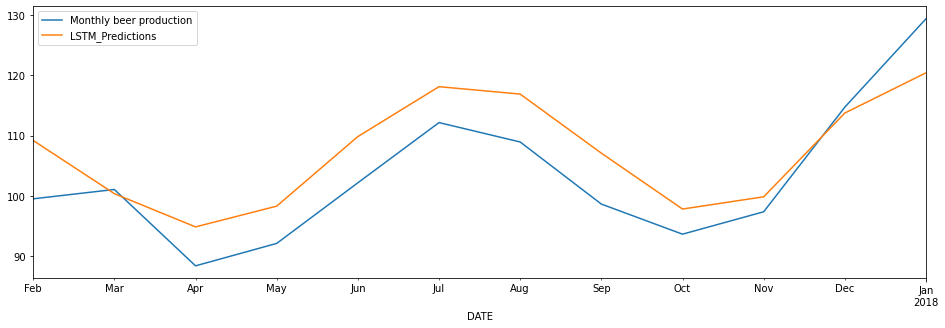

In [35]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [36]:
lstm_rmse_error = rmse(test_data['Monthly beer production'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 42.44977730787076
RMSE Error: 6.515349361919955
Mean: 88.84721763224182


In [39]:
rmse_errors = [arima_rmse_error, lstm_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})

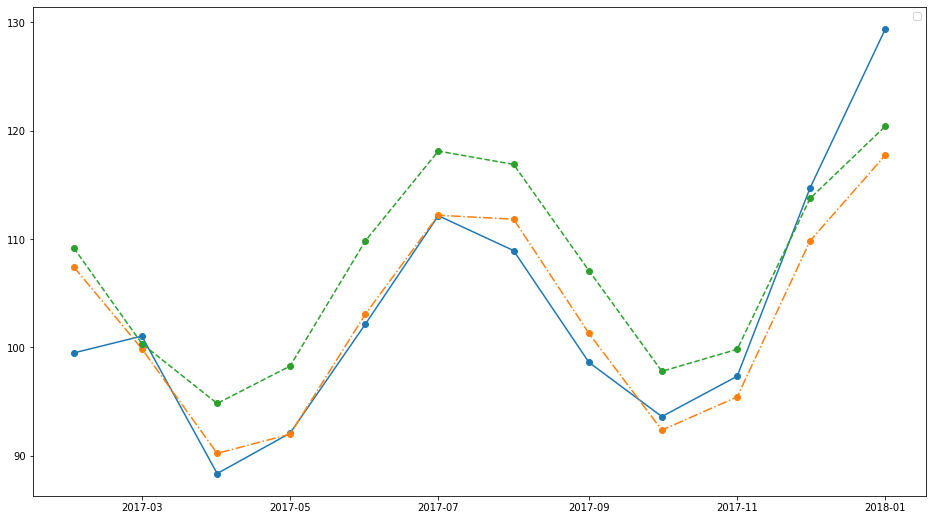

In [40]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["Monthly beer production"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--")

plt.legend()
plt.show()

In [41]:
print(f"Mean: {test_data['Monthly beer production'].mean()}")
errors

Mean: 103.15770000000002


,Models,RMSE Errors,MSE Errors
0,ARIMA,4.557617,20.771869
1,LSTM,6.515349,42.449777


In conclusion, SARIMA has better performance on this forecasting task. 
The reason can be that SARIMA models work well with time series data that has a clear seasonal pattern and are less sensitive to the amount of data available. LSTM networks, on the other hand, require large amounts of data to train effectively and may not perform well on time series data with short seasonal patterns.